In [5]:
from __future__ import annotations
from dotenv import load_dotenv
from pathlib import Path
import os, re, json, time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

# 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
family_name = fm.FontProperties(fname=font_path).get_name()  # 예: 'NanumGothic'
print("Resolved family:", family_name)
rcParams["font.family"] = family_name
rcParams["axes.unicode_minus"] = False  # 한글 폰트 사용시 마이너스 깨짐 방지

# 환경변수 설정
load_dotenv()

PROJECT_ROOT = Path().cwd().parent
DATA_DIR = PROJECT_ROOT / "data"
print(Path.cwd())
print(PROJECT_ROOT)
print(DATA_DIR)

Resolved family: NanumGothic
/home/user/workspace/redfin/redfin_label_api/notebooks
/home/user/workspace/redfin/redfin_label_api
/home/user/workspace/redfin/redfin_label_api/data


In [6]:
# load jsonl
with open(DATA_DIR / "entries_with_body.jsonl", "r", encoding="utf-8") as f:
    articles_data = [json.loads(line) for line in f]

articles_data = pd.DataFrame(articles_data)
articles_data.head()


,_id,guid,source,title,link,pub_date,author,category,tags,group,...,entry_key,authors,created_at,domain,feed_url,mirrored_at,published,updated,body,text_length
0,68b7e70933df1b522ba3be0a,https://openai.com/index/accelerating-life-sci...,"OpenAI Blog (공식, 변경 가능성 주의)",Accelerating life sciences research,https://openai.com/index/accelerating-life-sci...,"Fri, 22 Aug 2025 08:30:00 GMT",,,[],frontier_lab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68b7e70933df1b522ba3be0b,https://openai.com/index/blue-j,"OpenAI Blog (공식, 변경 가능성 주의)","Scaling domain expertise in complex, regulated...",https://openai.com/index/blue-j,"Thu, 21 Aug 2025 10:00:00 GMT",,,[],frontier_lab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68b7e70933df1b522ba3be0c,https://openai.com/index/mixi,"OpenAI Blog (공식, 변경 가능성 주의)",Mixi reimagines communication with ChatGPT,https://openai.com/index/mixi,"Wed, 20 Aug 2025 17:00:00 GMT",,,[],frontier_lab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68b7e70933df1b522ba3be0d,https://openai.com/index/doordash-mariana-gara...,"OpenAI Blog (공식, 변경 가능성 주의)","Q&A with DoorDash’s CPO, Mariana Garavaglia",https://openai.com/index/doordash-mariana-gara...,"Mon, 18 Aug 2025 00:00:00 GMT",,,[],frontier_lab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68b7e70933df1b522ba3be0e,https://openai.com/global-affairs/letter-to-go...,"OpenAI Blog (공식, 변경 가능성 주의)",OpenAI’s letter to Governor Newsom on harmoniz...,https://openai.com/global-affairs/letter-to-go...,"Tue, 12 Aug 2025 00:00:00 GMT",,,[],frontier_lab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
articles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               2174 non-null   object 
 1   guid              1645 non-null   object 
 2   source            1645 non-null   object 
 3   title             2174 non-null   object 
 4   link              2174 non-null   object 
 5   pub_date          1645 non-null   object 
 6   author            1645 non-null   object 
 7   category          1645 non-null   object 
 8   tags              1645 non-null   object 
 9   group             1645 non-null   object 
 10  scraped_at        1645 non-null   object 
 11  body_text         1645 non-null   object 
 12  body_text_length  1645 non-null   float64
 13  summary           2173 non-null   object 
 14  entry_key         529 non-null    object 
 15  authors           0 non-null      float64
 16  created_at        529 non-null    object 


In [8]:
print(articles_data.columns)

Index(['_id', 'guid', 'source', 'title', 'link', 'pub_date', 'author',
       'category', 'tags', 'group', 'scraped_at', 'body_text',
       'body_text_length', 'summary', 'entry_key', 'authors', 'created_at',
       'domain', 'feed_url', 'mirrored_at', 'published', 'updated', 'body',
       'text_length'],
      dtype='object')


In [9]:
# 결측치율
articles_data.isnull().mean().sort_values(ascending=False)


authors             1.00000
updated             0.99632
mirrored_at         0.75667
created_at          0.75667
entry_key           0.75667
published           0.75667
feed_url            0.75667
domain              0.75667
body                0.75667
text_length         0.75667
group               0.24333
category            0.24333
pub_date            0.24333
author              0.24333
source              0.24333
guid                0.24333
scraped_at          0.24333
tags                0.24333
body_text           0.24333
body_text_length    0.24333
summary             0.00046
link                0.00000
_id                 0.00000
title               0.00000
dtype: float64

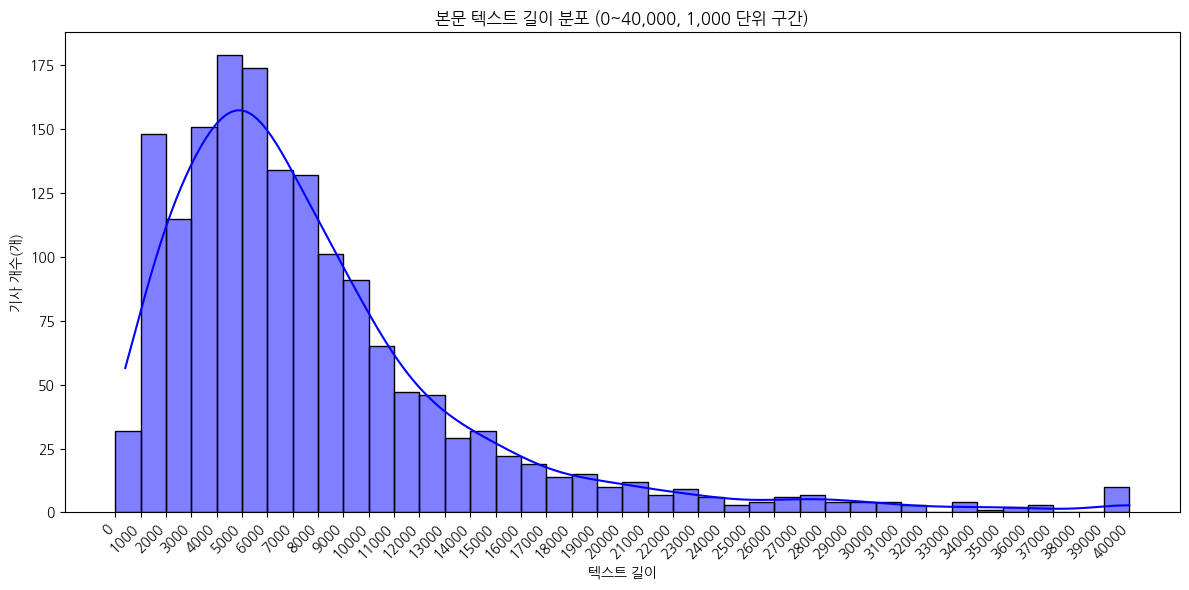

In [22]:
# 2) 텍스트 길이 (세부 구간별 분포 시각화)
plt.figure(figsize=(12, 6))
bins = list(range(0, 41000, 1000))  # 0~40000까지 1000 단위 구간
sns.histplot(
    articles_data['body_text_length'].dropna().clip(upper=40000),
    bins=bins,
    kde=True,
    color="blue",
    edgecolor="black"
)
plt.title("본문 텍스트 길이 분포 (0~40,000, 1,000 단위 구간)")
plt.xlabel("텍스트 길이")
plt.ylabel("기사 개수(개)")
plt.xticks(bins, rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

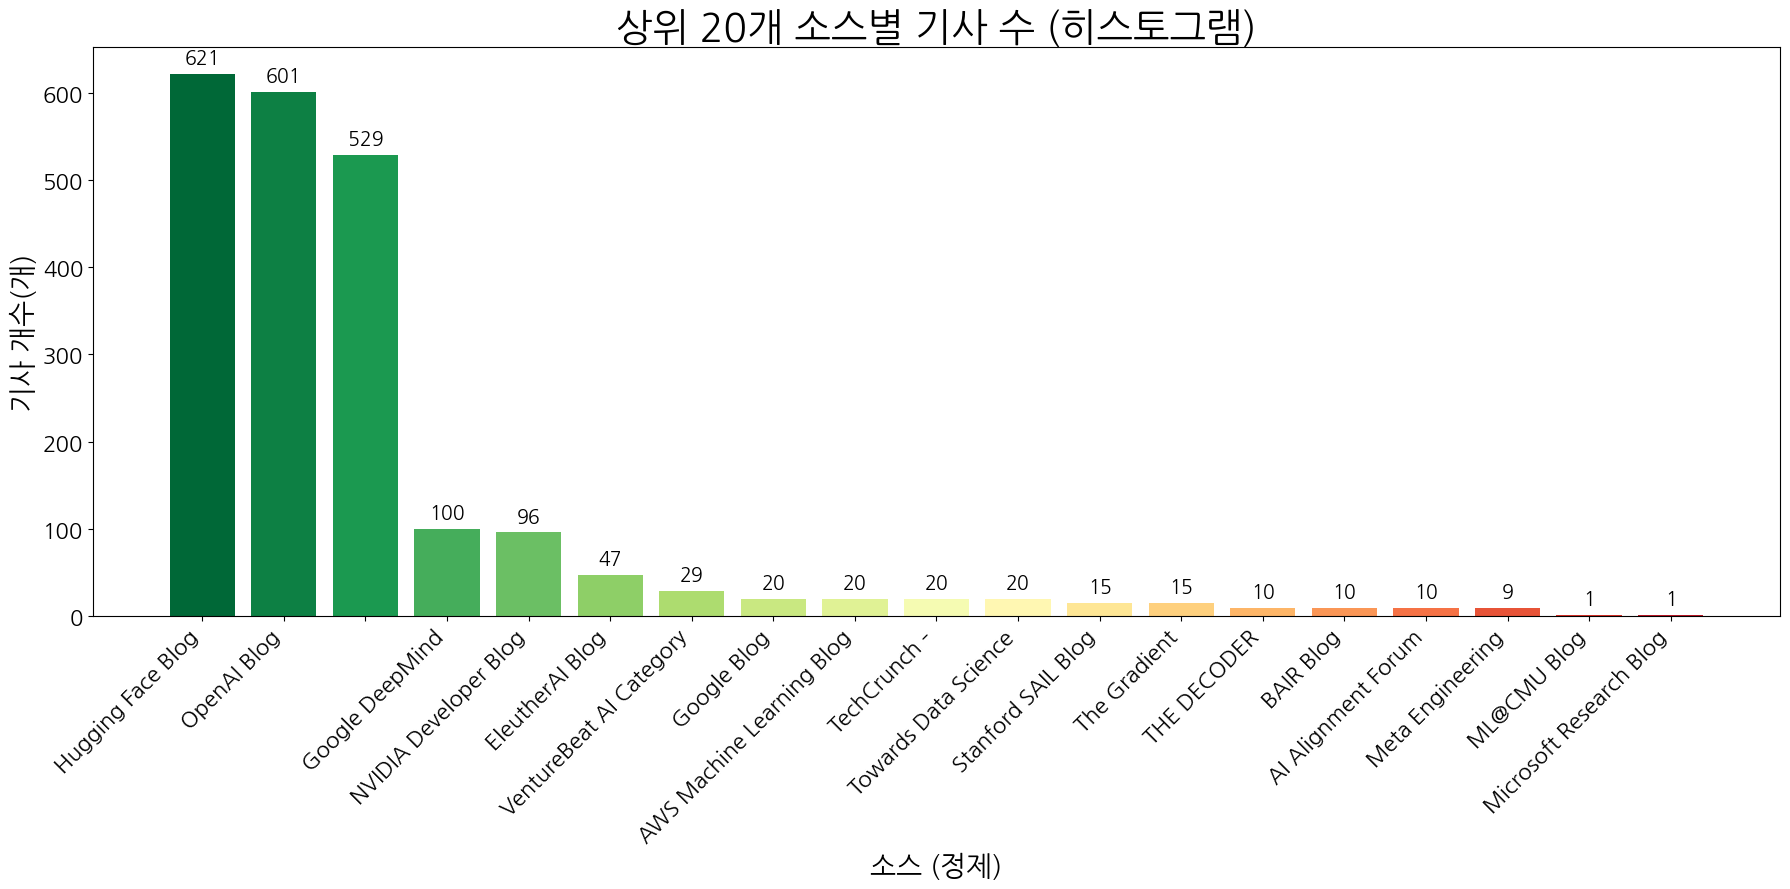

In [20]:
import matplotlib.pyplot as plt
import re

def clean_source_label(source: str) -> str:
    """소스명에서 불필요한 뒷단 정보 제거"""
    if not isinstance(source, str):
        return ""
    # 괄호 및 뒤쪽 설명 제거 (예: "OpenAI Blog (공식, 변경 가능성 주의)" → "OpenAI Blog")
    source = re.sub(r"\s*\(.*?\)", "", source)
    # ' - ' 또는 ' | ' 등 구분자 이후 정보 제거
    source = re.split(r" - | \| ", source)[0]
    # 'AI 카테고리', '엔지니어링 블로그', '뉴스', '피드' 등 키워드 제거
    source = re.sub(r"(AI\s*카테고리|엔지니어링\s*블로그|뉴스|피드|공식)$", "", source, flags=re.IGNORECASE).strip()
    return source

# 소스명 정제
articles_data['source_clean'] = articles_data['source'].map(clean_source_label)

# 상위 20개 정제된 source별 기사 수 집계
source_counts = articles_data['source_clean'].value_counts().head(20)

plt.figure(figsize=(18, 9))
bars = plt.bar(
    source_counts.index,
    source_counts.values,
    color=plt.cm.RdYlGn_r([i / len(source_counts) for i in range(len(source_counts))])
)
plt.title("상위 20개 소스별 기사 수 (히스토그램)", fontsize=28, weight='bold')
plt.ylabel("기사 개수(개)", fontsize=20)
plt.xlabel("소스 (정제)", fontsize=20)
plt.xticks(ticks=range(len(source_counts.index)), labels=source_counts.index, rotation=45, ha='right', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=14,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [ ]:
# 카테고리 분포
articles_data['category'].value_counts(normalize=True)

category
                      0.565350
Research              0.099696
Company               0.061398
Product               0.038298
Safety & Alignment    0.037082
                        ...   
Overviews             0.000608
AI and society        0.000608
Statistics            0.000608
Agentic AI            0.000608
LLM Applications      0.000608
Name: proportion, Length: 69, dtype: float64

In [ ]:
# 태그 분석
import wordcloud
from collections import Counter
all_tags = [t for tags in articles_data['tags'].dropna() for t in tags]
Counter(all_tags).most_common(30)

[('Research', 164),
 ('Company', 101),
 ('featured', 91),
 ('AI', 70),
 ('Product', 63),
 ('Safety & Alignment', 61),
 ('Story', 60),
 ('Generative AI', 57),
 ('Data Science', 42),
 ('Models / Libraries / Frameworks', 31),
 ('Data Center / Cloud', 27),
 ('Artificial Intelligence', 27),
 ('LLMs', 25),
 ('AI, ML and Deep Learning', 25),
 ('Global Affairs', 23),
 ('AI Platforms / Deployment', 22),
 ('Simulation / Modeling / Design', 22),
 ('Conversational AI', 20),
 ('NLP', 18),
 ('Top Stories', 17),
 ('Development & Optimization', 15),
 ('AI Agent', 14),
 ('Machine Learning', 13),
 ('Data Infrastructure', 12),
 ('Python', 11),
 ('Networking / Communications', 10),
 ('Inference Performance', 10),
 ('Amazon Bedrock', 10),
 ('Business', 10),
 ('Robotics', 8)]

<Axes: xlabel='pub_date'>

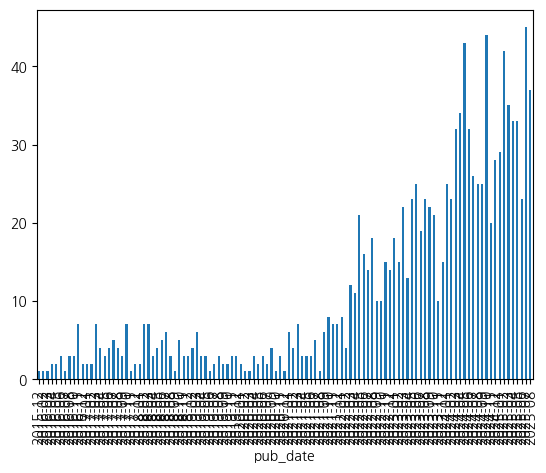

In [ ]:
# 시간 분포
articles_data['pub_date'] = pd.to_datetime(articles_data['pub_date'], errors='coerce')
articles_data['pub_date'].dt.to_period("M").value_counts().sort_index().plot(kind="bar")